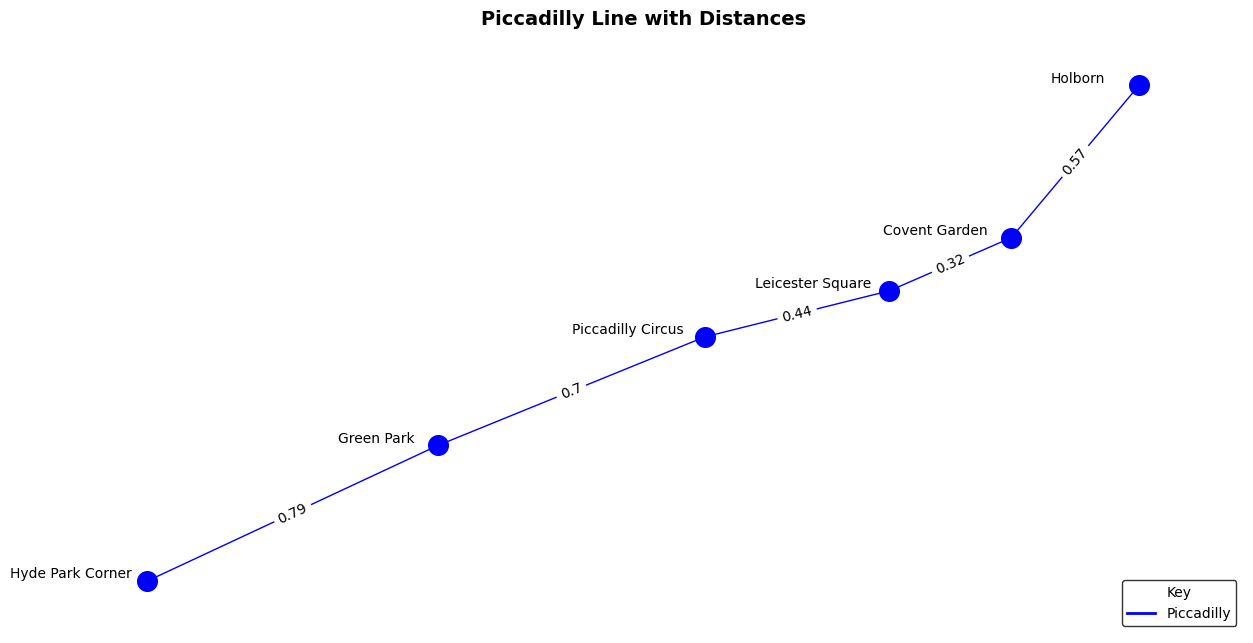

In [83]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the CSV file and strip spaces from column names
file_path = 'London stations.csv'
stations_data = pd.read_csv(file_path)
stations_data.columns = stations_data.columns.str.strip()  # Remove extra spaces

# Define a function to calculate the haversine distance between two points
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

# Calculate the distance for each edge and assign a color
edges = [
    ("Hyde Park Corner", "Green Park"),
    ("Green Park", "Piccadilly Circus"),
    ("Piccadilly Circus", "Leicester Square"),
    ("Leicester Square", "Covent Garden"),
    ("Covent Garden", "Holborn")
]

# Add distances and colors to the edges
colored_edges = []
for edge in edges:
    station1 = stations_data[stations_data['Station'] == edge[0]].iloc[0]
    station2 = stations_data[stations_data['Station'] == edge[1]].iloc[0]
    distance = haversine(station1['Latitude'], station1['Longitude'],
                         station2['Latitude'], station2['Longitude'])
    colored_edges.append((edge[0], edge[1], round(distance, 2), 'blue'))

# Create the graph
G = nx.Graph()
for _, row in stations_data.iterrows():
    G.add_node(row['Station'], pos=(row['Longitude'], row['Latitude']))
G.add_edges_from([(edge[0], edge[1]) for edge in colored_edges])

# Get graph positions
pos = nx.get_node_attributes(G, 'pos')

# Define adjusted label positions
label_pos_adjustments = {
    "Hyde Park Corner": (-0.0025, 0.0002),
    "Green Park": (-0.002, 0.0002),
    "Piccadilly Circus": (-0.0025, 0.0002),
    "Leicester Square": (-0.0025, 0.0002),
    "Covent Garden": (-0.0025, 0.0002),
    "Holborn": (-0.002, 0.0002),
}

# Calculate adjusted label positions
label_pos = {station: (pos[station][0] + adj[0], pos[station][1] + adj[1]) 
             for station, adj in label_pos_adjustments.items()}

# Plot the graph
plt.figure(figsize=(12, 6))

# Draw the nodes and edges
nx.draw(
    G, pos, with_labels=False, node_color='blue', edge_color='blue',
    node_size=200, font_size=10, font_color='black', font_weight='bold'
)

# Draw station labels with adjusted positions
for station, (x, y) in label_pos.items():
    plt.text(x, y, station, fontsize=10, ha='center', va='center', color='black')

# Add edge labels showing distances (in kilometers)
edge_labels = {(edge[0], edge[1]): f"{edge[2]}" for edge in colored_edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black', font_size=10)

# Add the legend in a bordered box
blue_line = plt.Line2D([0], [0], color='blue', lw=2, label='Piccadilly')
plt.legend(
    handles=[blue_line], loc='lower right', fontsize=10,
    title="Key", frameon=True, edgecolor='black'
)

# Add a title
plt.title("Piccadilly Line with Distances", fontsize=14, fontweight='bold')
plt.show()
